100%|██████████| 12000/12000 [00:00<00:00, 19765.18it/s]


18


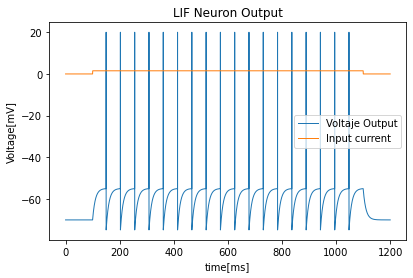

In [1]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

#variables temporales

dt = 0.1
t_ini = 0
t_fin = 1200
tiempo = np.linspace(t_ini, t_fin, int((t_fin - t_ini) / dt))


class LIF:
    Rm = 10              #Resistencia de membrana 10MOhms (10e6)
    Cm = 1               #Capacitancia de membrana 1nF (1e-9)
    tm = Rm * Cm         #constante temporal membrana  mV
    El = -70             #voltaje de reposo  mV
    vreset = -75         #voltaje de reset   mV
    vth = -55            #voltaje de  umbral mV
    vspike = 20          #voltaje de disparo mV
    V = El
    V_hist = np.array([])
    Isyn_hist = np.array([])
    t_fire = np.array([])

    def simulate(self, t, Isyn):
        #tiempo actual de simulacion
        #I orriente de entrada de la neurona
        Rm = self.Rm               #Resistencia de membrana
        tm = self.tm              #constante temporal membrana 
        El = self.El            #voltaje de reposo 
        vreset = self.vreset         #voltaje de reset
        vth = self.vth          #voltaje de  umbral
        vspike = self.vspike

        V = self.V
        if(V == vspike):
            V = vreset

        dV = (El - V + Rm * Isyn)/tm
        V = V + dt * dV
        diracDelta = 0

        if(V>= vth):                    #el voltaje de membrana supera el umbral, hay disparo
            V = vspike                  #se resetea el voltaje de membrana
            diracDelta = 1                 #lo mismo que diracDelta con t=tf
            self.t_fire = np.append(self.t_fire, t)
        self.V =  V
        self.V_hist = np.append(self.V_hist, V)
        self.Isyn_hist = np.append(self.Isyn_hist, Isyn)
        return diracDelta


Ic = 1.51 #riobase
# Ic = 1.81  #corriente de  entrada en nano Amperes para 50hz
# Ic = 2.65   #corriente de  entrada en nano Amperes para 99hz
# Ic = 4.6   #corriente de  entrada en nano Amperes para 200hz
# Ic = 22         #corriente de entrada para 1000hz
neuron = LIF()



teqdm = range(len(tiempo))        
for a in tqdm(teqdm):
    t = tiempo[a]
    if(t<100):
        neuron.simulate(t, 0)
    elif(t<1100):
        neuron.simulate(t, Ic)
    else:
        neuron.simulate(t, 0)


frec = len(neuron.t_fire)

print(frec)

fig, (ax) = plt.subplots(1, figsize=(6.4, 4))
ax.plot(tiempo,neuron.V_hist, linewidth = 1, label = 'Voltaje Output')
ax.plot(tiempo,neuron.Isyn_hist, linewidth = 1, label = 'Input current')
ax.legend()
ax.set(xlabel = 'time[ms]' , ylabel = 'Voltage[mV]')
ax.set_title('LIF Neuron Output')
fig.savefig('LIF.pdf')



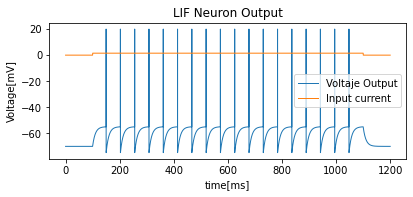

In [3]:
fig, (ax) = plt.subplots(1, figsize=(6.4, 2.5))
ax.plot(tiempo,neuron.V_hist, linewidth = 1, label = 'Voltaje Output')
ax.plot(tiempo,neuron.Isyn_hist, linewidth = 1, label = 'Input current')
ax.legend()
ax.set(xlabel = 'time[ms]' , ylabel = 'Voltage[mV]')
ax.set_title('LIF Neuron Output')
fig.savefig('LIF.pdf')

In [ ]:
Cm = 1e-9
Rm = 10e6
tm = Rm * Cm
print(tm)